# Collaborative Recommendation System_K Nearest Neighbour
We will use the Movie Lens dataset to create a Recommender System with the K-Nearest Neighbour Algorithm
<br>Dataset : https://grouplens.org/datasets/movielens/latest


## Collaborative Filtering
- User 1 buys Iphone + Earphones<br>
- User 2 buys Iphone<br>
- Collaborative RS recommends Earphones to User 2 as User 1 had bought Earphones with Iphone

## Content Based Filtering
- User 1 watches Movie A
- Movie B is similar to Movie A (same genre etc)
- Content Based RS recommends Movie B to User 1 

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# import dataset
movies_df = pd.read_csv("movies.csv")
ratings_df = pd.read_csv("ratings.csv")

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.4+ KB


In [5]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# column 'movieId' is common to both dataframes
# merging both the the dataframes on 'movieId'

df = pd.merge(ratings_df,movies_df,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
print("Movies dataset dimensions: ",movies_df.shape)
print("Ratings dataset dimensions: ",ratings_df.shape)
print("Merged dataset dimensions: ",df.shape)

Movies dataset dimensions:  (9742, 3)
Ratings dataset dimensions:  (100836, 4)
Merged dataset dimensions:  (100836, 6)


Since we are going to recommend movies based on user ratings, we must calculate the number of times a movie has been rated as well.

In [11]:
# dropping all the NaN values in the dataset
combine_movie_rating = df.dropna(axis=0, subset=['title']) 

# calculating how many ratings have been received by each movie
movie_ratingCount = (combine_movie_rating.
                     groupby(by=['title'])['rating']. # grouping by the column 'title' wrt the column 'rating'
                     count(). # counting the total instances
                     reset_index(). # resetting the index so that 'title' is not set as index 
                     rename(columns = {'rating': 'totalRatingCount'}) # renaming 'rating' to 'totalRatingCount'
                     [['title', 'totalRatingCount']] # two columns of the new dataset
                    )

movie_ratingCount.head() # print the head of the dataset

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


Merge the column `totalRatingCount` and merge it with original Dataset `df`

In [12]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on='title', right_on='title', how='left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215


In [13]:
# print out more information about the column 'totalRatingCount'
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_ratingCount['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


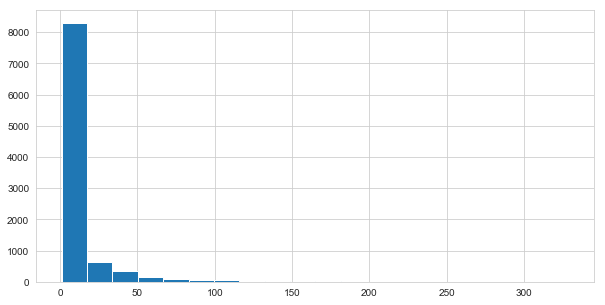

In [18]:
# plot a histogram of total ratings received per movie
plt.figure(figsize=(10,5))
movie_ratingCount['totalRatingCount'].hist(bins=20)

From the above histogram, we understand that the threshold for the number of ratings each movie has received should be at least greater than 50

In [19]:
# therefore, filtering the dataset with movies with ratings greater than 50
rating_threshold = 50 # define a threshold for the number of movies
rating_popular_movies = rating_with_totalRatingCount.query('totalRatingCount >= @rating_threshold')
rating_popular_movies.head()


,userId,movieId,rating,timestamp,title,genres,totalRatingCount
0,1,1,4.000,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.000,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.500,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.500,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.500,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215


In [27]:
# Compare the dimensions of the dataset before and after filtering by the threshold
print('Dimensions of dataset before filtering : ',rating_with_totalRatingCount.shape)
print('Dimensions of dataset after filtering  : ',rating_popular_movies.shape)

Dimensions of dataset before filtering :  (100836, 7)
Dimensions of dataset after filtering  :  (41362, 7)


Create a Pivot Matrix for the above dataset `rating_popular_movies`

In [35]:
# Create a pivot table matrix
movie_features_df = rating_popular_movies.pivot_table(
                    index = 'title', 
                    columns = 'userId', 
                    values = 'rating').fillna(0) # fillna(0) ensures that any movie that has not been rated by a particular user gets a values as 0
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


Now that our dataset has been transformed in a pivot matrix. We will tranform it into array-matrix

In [36]:
# import csr_matrix from scipy.sparse library to convert pivot into array matrix
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

KNN works on the principal of Euclidean Distance between the 2 vectors
<br>Whereas, Cosine Similarity works on the angle between the vectors.

In [41]:
# import K Nearest Neighbours from sklearn.neighbours library
from sklearn.neighbors import NearestNeighbors

# build the model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [44]:
movie_features_df.shape

(450, 606)

In [43]:
# taking a random record
query_index = np.random.choice(movie_features_df.shape[0])
query_index

236

In [45]:
# find the similar movies to the movie ID in the query index
# calculate the vector with 6 neighbors
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

In [54]:
distances

array([[0.        , 0.41977555, 0.45113675, 0.47671323, 0.47983893,
        0.48292948]])

In [53]:
(distances.flatten())

array([0.        , 0.41977555, 0.45113675, 0.47671323, 0.47983893,
       0.48292948])

In [48]:
indices

array([[236, 326, 149,  27, 324,  91]], dtype=int64)

In [60]:
# print recommendations for a random movie selected in 'query_index'
for i in range(0,len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, at a distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for L.A. Confidential (1997):

1: Reservoir Dogs (1992), at a distance of 0.41977554547044493:
2: Fargo (1996), at a distance of 0.45113675495321026:
3: Apocalypse Now (1979), at a distance of 0.4767132293791183:
4: Rear Window (1954), at a distance of 0.4798389315835604:
5: Chinatown (1974), at a distance of 0.4829294804058538:


# Therefore, we have successfully implemented a Movie Recommendation System based on K Nearest Neighbour and Cosine Similarity

## Thank you